# Heart Disease Prediction using Neural Networks

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 1. Importing the Dataset

In [ ]:
cleveland = pd.read_csv('heart.csv')
print(cleveland.head)

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  target  
0        3  0    6       0  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print (cleveland.shape)
print (cleveland.loc[1])

(303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca            3
thal          3
target        1
Name: 1, dtype: object


In [ ]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [ ]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [ ]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1


In [ ]:
print (data.shape)
print (data.dtypes)

(297, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object


In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


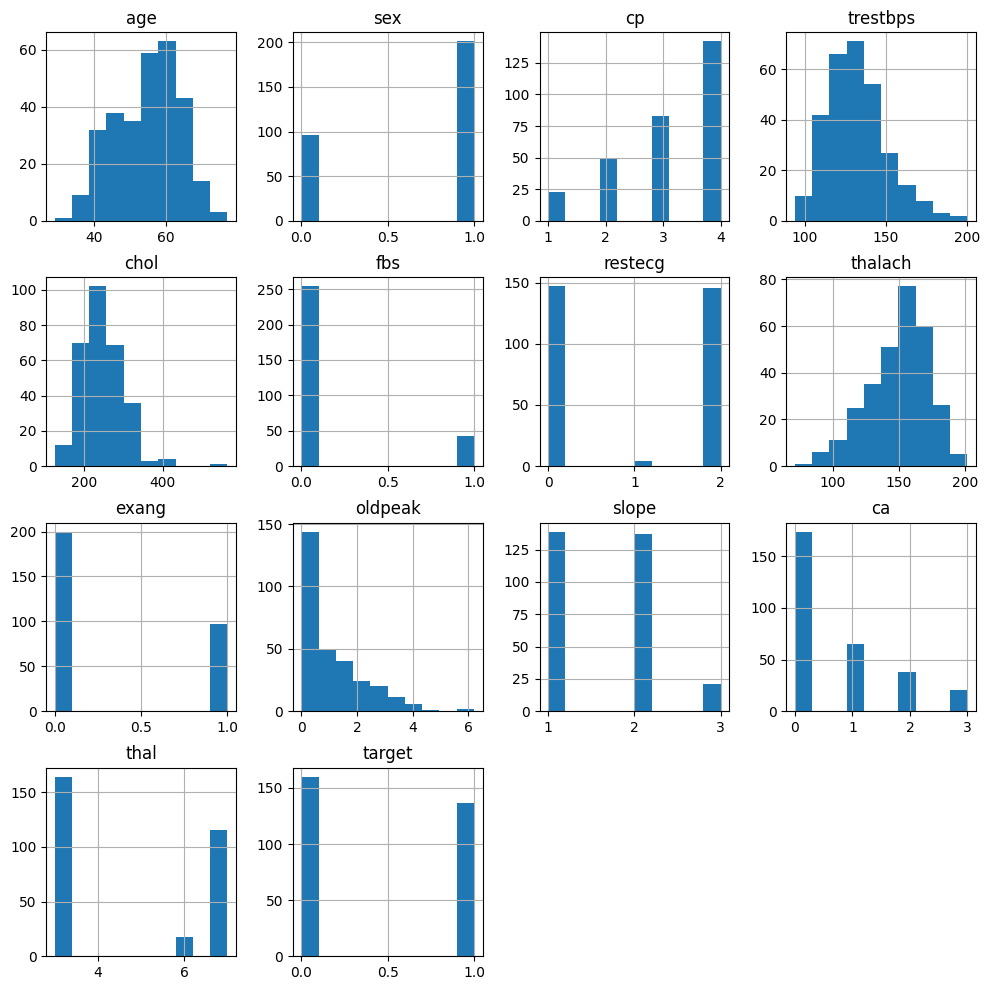

In [ ]:

data.hist(figsize = (12, 12))
plt.show()

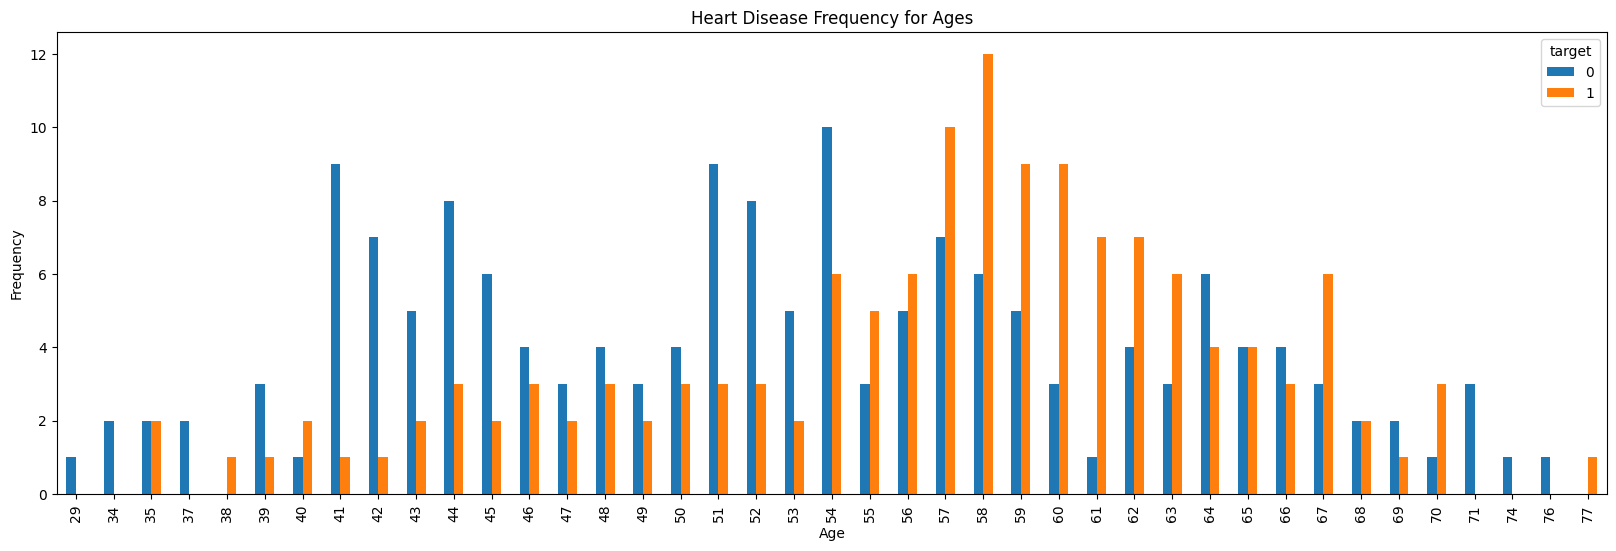

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from tensorflow import keras

Y_train = keras.utils.to_categorical(y_train, num_classes=None)
Y_test = keras.utils.to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158 (632.00 B)

 Trainable params: 158 (632.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5045 - loss: 0.9609
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6114 - loss: 0.6911
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5037 - loss: 0.6840
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5979 - loss: 0.6742
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6232 - loss: 0.6708
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6306 - loss: 0.6502
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6609 - loss: 0.6534
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6836 - loss: 0.6353
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7352 - loss: 0.5963
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6501 - loss: 0.6211
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 0.6112  
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1]


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5104 - loss: 0.7029
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5738 - loss: 0.7251 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.6594 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 0.6613 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.6222 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - loss: 0.6003  
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.6163 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.5750 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.5218 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5534 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - loss: 0.6114 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
# import necessary libraries
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report

# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Results for Binary Model
0.8833333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.89      0.77      0.83        22

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60

